# Import the files and sort the house

In [1]:
from pathlib import Path
from manim import * 
import matplotlib.pyplot as plt 
import importlib.util

file_path = Path(r'C:\Users\Bowen\PycharmProjects\General Relativity\Schwarzschild')

# Add the directory to the Python path
sys.path.append(str(file_path))

# Function to import a module given its name and file path
def import_module(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Import Blackhole.py
blackhole_module_path = file_path / 'Blackhole.py'
Blackhole = import_module('Blackhole', blackhole_module_path)

# Import Utilities.py
utilities_module_path = file_path / 'Utilities.py'
Utilities = import_module('Utilities', utilities_module_path)


Manim Community v0.17.3

C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Create the class instance. Obtain the data and rotate the points. 

In [3]:
Rs = 1
D = 10*Rs
Dv = D - Rs
resize_length = 1000
fov_side = 130 
fov_above = 70 

BH_instance = Blackhole.black_hole(Rs, D, Dv, 'milkyway.jpg', resize_length, fov_side, fov_above)


In [41]:
angles_to_consider = range(15, 50, 15) 
angles = np.array(angles_to_consider)
angle = np.deg2rad(angles)
print(angles)
coords = BH_instance.check_plot_multiples(angle, return_array=True)
coords = np.array(coords, dtype='object')

[15 30 45]


In [42]:
# Create copies of coords
rotation_angles = np.linspace(60, 360, 5)
rotation_angles = np.deg2rad(rotation_angles)
rotation_matrix = Utilities.rotation_matrix(angle)

coords_list = []

for i in range(len(rotation_angles)):
    dat = np.copy(coords)
    rotation_matrix = Utilities.rotation_matrix(rotation_angles[i])
    dat_x = dat @ rotation_matrix.T
    coords_list.append(dat_x) 
    
coords_list.insert(0, coords)

C:\Users\Bowen\PycharmProjects\General Relativity\Schwarzschild\Utilities.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rx = np.array([[1, 0, 0],


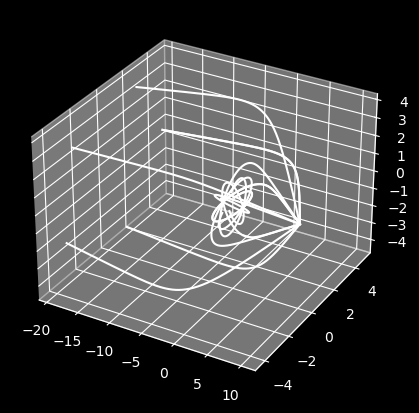

In [43]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111, projection='3d')

for idx in range(len(coords_list)): 
    for k in range(0, 2):
        
        X = coords_list[idx][k][0]
        Y = coords_list[idx][k][1]
        Z = coords_list[idx][k][2]
        ax1.plot3D(X, Y, Z, color='w')

plt.show() 

# Create the Manim Scene

## Create the equation lore first 

In [361]:
%%manim -qh AnimateEquations

class AnimateEquations(Scene):
    def construct(self): 
        # Title text
        tex = Tex('Black hole equations').shift(UP * 2.0).scale(1.1) 
        self.play(FadeIn(tex))
        
        # Schwarzschild metric
        schwarz_met = MathTex(
            r" = -\left(1 - \frac{2GM}{c^2r}\right)c^2 dt^2 + \left(1 - \frac{2GM}{c^2r}\right)^{-1} dr^2 + r^2 d\theta^2 + r^2 \sin^2\theta \, d\phi^2"
        ).scale(0.65) 
        
        spacetime_int = MathTex(r'ds^2').scale(0.65).next_to(schwarz_met, direction = LEFT * 0.5)
        
        met_info = Tex('The Schwarzschild metric').scale(0.45).next_to(schwarz_met, direction = DOWN)
        self.play(Write(schwarz_met), Write(spacetime_int), Write(met_info), run_time = 1)
        self.wait() 
        
        # Transform to null geodesics and cross out ds^2
        tex2 = Tex('For null geodesics').shift(UP * 2.0).scale(1.1) 
        cross_out = Line(spacetime_int.get_left(), spacetime_int.get_right(), color=RED)
        self.play(Create(cross_out), Transform(tex, tex2), run_time = 1.25)

        # Transform to ds^2 = 0
        zero = MathTex(r"0").scale(0.65).next_to(schwarz_met, direction = LEFT * 0.5)
        self.play(Transform(spacetime_int, zero), FadeOut(cross_out), run_time = 1.0)
        
        self.wait()         
        
        ## Identifying the Christoffel symbols
        tex3 = Tex('Obtaining the Christoffel symbols').shift(UP * 2.0).scale(1.1) 
        Chris_eq = MathTex(
            r"\Gamma^\alpha_{\mu\nu} = \frac{1}{2} g^{\alpha\lambda} \left[ g_{\mu\lambda,\nu} + g_{\nu\lambda,\mu} - g_{\mu\nu,\lambda} \right]"
        ).scale(0.8)
        inv_info = MathTex(r"\text{Inverse metric:} \;\;\;\; g^{\alpha\lambda}").scale(0.5).next_to(Chris_eq, direction = DOWN)
        
        self.play(Transform(tex, tex3),FadeOut(spacetime_int, zero, schwarz_met, met_info), run_time = 1)
        self.play(FadeIn(Chris_eq, inv_info))
        self.wait()
        self.play(Uncreate(Chris_eq), FadeOut(inv_info), run_time = 0.75)
        ## Write down all the Christoffel symbols. 
        
        Symbols = MathTex(
            r"\Gamma^t_{tr} = \Gamma^t_{rt} = \frac{1}{2} \frac{r_s}{r(r - r_s)}, & \quad \Gamma^r_{tt} = \frac{1}{2} \frac{r_s (r - r_s)}{r^3}, \\",
            r"\Gamma^r_{rr} = \frac{1}{2} \frac{r_s}{r_s - r}, & \quad \Gamma^r_{\theta\theta} = r_s - r, \\",
            r"\Gamma^r_{\phi\phi} = (r_s - r) (\sin\theta)^2, \\",
            r"\Gamma^\theta_{r\theta} = \Gamma^\theta_{\theta r} = \Gamma^\phi_{r\phi} = \Gamma^\phi_{\phi r} = \frac{1}{r}, \\",
            r"\Gamma^\theta_{\phi\phi} = -\sin\theta \cos\theta, & \quad \Gamma^\phi_{\theta\phi} = \Gamma^\phi_{\phi\theta} = \cot\theta"
        ).scale(0.6).shift(DOWN * 0.5)

        # Add the equations to the scene
        self.play(FadeIn(Symbols))
        self.wait(0.75)
        self.play(FadeOut(Symbols))
        
        ## Add the 4th scene 
        tex4 = Tex('Applying the Geodesic equation').shift(UP * 2.0).scale(1.1) 
        
        ## Geodesic equation
        general_geodesic = MathTex(
            r"\frac{d^2 x^\alpha}{ds^2} + \Gamma^\alpha_{\mu\nu} \frac{dx^\mu}{ds} \frac{dx^\nu}{ds} = 0"
        ).scale(0.7).shift(UP * 0.75)
        
        self.play(Transform(tex, tex4), FadeIn(general_geodesic), run_time = 0.75)
        
        # Define equations
        eq1 = MathTex(
            "0", "=", 
            "\\frac{d^2(ct)}{d\\lambda^2}", "+", 
            "\\Gamma^{t}_{\\mu\\nu}", 
            "\\frac{dx^{\\mu}}{d\\lambda}", 
            "\\frac{dx^{\\nu}}{d\\lambda}"
        ).scale(0.5).next_to(general_geodesic, direction=DOWN)
        
        eq2 = MathTex(
            "0", "=", 
            "\\frac{d^2r}{d\\lambda^2}", "+", 
            "\\Gamma^{r}_{\\mu\\nu}", 
            "\\frac{dx^{\\mu}}{d\\lambda}", 
            "\\frac{dx^{\\nu}}{d\\lambda}"
        ).scale(0.5).next_to(eq1, direction=DOWN)
        
        eq3 = MathTex(
            "0", "=", 
            "\\frac{d^2\\theta}{d\\lambda^2}", "+", 
            "\\Gamma^{\\theta}_{\\mu\\nu}", 
            "\\frac{dx^{\\mu}}{d\\lambda}", 
            "\\frac{dx^{\\nu}}{d\\lambda}"
        ).scale(0.5).next_to(eq2, direction=DOWN)
        
        eq4 = MathTex(
            "0", "=", 
            "\\frac{d^2\\phi}{d\\lambda^2}", "+", 
            "\\Gamma^{\\phi}_{\\mu\\nu}", 
            "\\frac{dx^{\\mu}}{d\\lambda}", 
            "\\frac{dx^{\\nu}}{d\\lambda}"
        ).scale(0.5).next_to(eq3, direction=DOWN)
        
        # Add everything to the scene
        all_geodesics = VGroup(eq1, eq2, eq3, eq4)
        self.play(FadeIn(all_geodesics))
        self.wait()

        
        ## The final stretch of equations
        combined_eq = MathTex(
            "\\frac{1}{2} \\left(\\frac{d r}{d \\lambda}\\right)^2 + \\frac{l^2}{2r^2} \\left( 1 - \\frac{2GM}{rc^2} \\right) = \\frac{1}{2} \\frac{E^2}{c^2}"
        ).scale(0.7)
        combined_eq_info = MathTex(r'\text{Confined to:} \;\;\;\; \theta = \pi/2').scale(0.45).next_to(combined_eq, direction=DOWN)
        tex5 = Tex('The governing equation').shift(UP * 2.0).scale(1.1) 
        self.play(FadeOut(all_geodesics), FadeOut(general_geodesic), Transform(tex, tex5), run_time = 1)
        self.play(FadeIn(combined_eq, combined_eq_info), run_time = 1)
        self.wait() 
    
        ## The dust settles
        tex6 = Tex('The governing equation').shift(UP * 2.0).scale(1.1) 
        photon_geo = MathTex(
            "\\frac{d^2 u}{d \\phi^2} - \\frac{3}{2} R_s u^2 + u = 0").scale(0.7)
        photon_geo_info = MathTex(r'u = 1/r').scale(0.5).next_to(photon_geo, direction=DOWN)
        self.play(Transform(combined_eq, photon_geo), 
                  Transform(combined_eq_info, photon_geo_info), Transform(tex, tex6))
        self.play(FadeOut(tex), runtime=1)
        self.wait(0.5)
        
        ## Initial conditions 
        self.play(combined_eq.animate.shift(UP * 2), Uncreate(combined_eq_info), run_time = 1)
        cond1 = MathTex(r'u = \frac{1}{D}').scale(0.6).shift(UP * 1)
        cond2 = MathTex(r"u' = \frac{1}{D\tan{\alpha}}").scale(0.6).next_to(cond1, direction = DOWN)
        self.play(Write(cond1), Write(cond2), run_time = 1)
        self.wait(0.5) 
        
        ## Update function
        what_for = Tex('Updating method').scale(0.6).next_to(cond2, direction = DOWN * 1.25)
        eq1 = MathTex(r"u' + u'' \times \delta \phi \rightarrow u'").scale(0.6).next_to(what_for, direction = DOWN)
        eq2 = MathTex(r"u + u' \times \delta \phi \rightarrow u").scale(0.6).next_to(eq1, direction = DOWN)
        self.play(Write(what_for), FadeIn(eq1), FadeIn(eq2), run_time = 1)
        self.wait(2) 
        

[07/30/24 22:49:16] INFO     Writing Black hole equations to media\Tex\9eb66ea670a64834.tex  ]8;id=222934;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=991745;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[07/30/24 22:49:20] INFO     Animation 0 : Partial movie file written in                   ]8;id=860718;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=175399;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\2902699114_4211319633_223132457.mp4'                               

[07/30/24 22:49:24] INFO     Animation 1 : Partial movie file written in                   ]8;id=628084;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=605510;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3287241862_822062652.mp4'                               

[07/30/24 22:49:25] INFO     Animation 2 : Partial movie file written in                   ]8;id=843171;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=996615;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3315967912_21794085.mp4'                                

[07/30/24 22:49:28] INFO     Animation 3 : Partial movie file written in                   ]8;id=307;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=788193;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3242325691_1528317995.mp4'                              

[07/30/24 22:49:30] INFO     Animation 4 : Partial movie file written in                   ]8;id=278976;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=471547;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3850245842_1377910055.mp4'                              

[07/30/24 22:49:31] INFO     Animation 5 : Partial movie file written in                   ]8;id=326114;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=789650;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3315967912_1365422191.mp4'                              

[07/30/24 22:49:36] INFO     Animation 6 : Partial movie file written in                   ]8;id=270540;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=714544;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3819132182_4116059557.mp4'                              

[07/30/24 22:49:38] INFO     Animation 7 : Partial movie file written in                   ]8;id=409777;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=403237;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_385561567_401740958.mp4'                                

[07/30/24 22:49:40] INFO     Animation 8 : Partial movie file written in                   ]8;id=925475;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=266091;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3315967912_60946694.mp4'                                

[07/30/24 22:49:41] INFO     Animation 9 : Partial movie file written in                   ]8;id=916605;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=664440;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3889598731_738510223.mp4'                               

[07/30/24 22:49:46] INFO     Animation 10 : Partial movie file written in                  ]8;id=271539;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=575029;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_4147677814_3796462385.mp4'                              

[07/30/24 22:49:47] INFO     Animation 11 : Partial movie file written in                  ]8;id=493422;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=237529;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3108075916_919779480.mp4'                               

[07/30/24 22:49:53] INFO     Animation 12 : Partial movie file written in                  ]8;id=720896;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=284364;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_2971429500_1702919510.mp4'                              

[07/30/24 22:49:57] INFO     Animation 13 : Partial movie file written in                  ]8;id=158595;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=650434;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3173658997_3175298226.mp4'                              

[07/30/24 22:50:01] INFO     Animation 14 : Partial movie file written in                  ]8;id=307384;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=837416;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_1813753833_3915356133.mp4'                              

[07/30/24 22:50:03] INFO     Animation 15 : Partial movie file written in                  ]8;id=904943;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=551048;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3315967912_1435749568.mp4'                              

[07/30/24 22:50:09] INFO     Animation 16 : Partial movie file written in                  ]8;id=900183;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=834827;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_601582494_3134434585.mp4'                               

[07/30/24 22:50:12] INFO     Animation 17 : Partial movie file written in                  ]8;id=207398;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=345363;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3521524646_2469109885.mp4'                              

[07/30/24 22:50:13] INFO     Animation 18 : Partial movie file written in                  ]8;id=340213;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=303221;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_3315967912_3093678353.mp4'                              

[07/30/24 22:50:17] INFO     Animation 19 : Partial movie file written in                  ]8;id=504247;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=650710;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_1148422153_1604089292.mp4'                              

[07/30/24 22:50:19] INFO     Animation 20 : Partial movie file written in                  ]8;id=735974;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=961141;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\3931933789_4033128169_2652638992.mp4'                              

[07/30/24 22:50:20] INFO     Animation 21 : Using cached data (hash :                          ]8;id=623675;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=313674;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_2526496290_104065606)                                                      

                    INFO     Animation 22 : Using cached data (hash :                          ]8;id=539777;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=396237;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_2342114844_2551365647)                                                     

[07/30/24 22:50:21] INFO     Animation 23 : Using cached data (hash :                          ]8;id=864445;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=663866;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_89565095_3032440315)                                                       

                    INFO     Animation 24 : Using cached data (hash :                          ]8;id=770437;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=654694;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2365230007_2526496290_3136261384)                                                     

                    INFO     Animation 25 : Using cached data (hash :                          ]8;id=389431;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=827942;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_135896052_3768331671)                                                      

[07/30/24 22:50:23] INFO     Animation 26 : Partial movie file written in                  ]8;id=868658;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=608927;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\AnimateEquations\2365230007_190800790_1065265227.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=416933;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=774074;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=352132;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=143113;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\AnimateEquations.m                         
                             p4'                                                                                   
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=572888;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=830590;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#708\708]8;;\
                             manim has removed the 4 oldest file(s). You can change this                           
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered AnimateEquations                                                 ]8;id=332699;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=530622;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 27 animations                                                                  

## Create the visual lore

In [44]:
%%manim -qh VisualizeGeodesic

class VisualizeGeodesic(ThreeDScene):    
    def scene_one(self):
        sphere = Sphere(radius=Rs).set_color(BLACK)
        sphere.set_stroke(color=DARKER_GREY, width=1.5)
        self.set_camera_orientation(phi=50 * DEGREES, theta=-45 * DEGREES, zoom=0.35)
        self.play(Create(sphere), run_time = 0.5) 
        self.wait()
        
        ## Animate the Geodesic lines that gets captured. 
        X = coords_list[0][0][0]
        Y = coords_list[0][0][1]
        Z = coords_list[0][0][2]
        
        # Create points from the arrays
        points = [np.array([x, y, z]) for x, y, z in zip(X, Y, Z)]

        # Create a VMobject to hold the line segments
        line = VMobject()
        line.set_points_as_corners(points)
        line.set_color(RED_A)
        line.set_stroke(width=3.5, opacity=0.7)
        
        ## Animate the Geodesic lines that escapes
        X1 = coords_list[0][1][0]
        Y1 = coords_list[0][1][1]
        Z1 = coords_list[0][1][2]
        
        x1_len = len(X1)
        prop = 0.9
        points_escape = [np.array([x1, y1, z1]) for x1, y1, z1 in 
                         zip(X1[ : round(prop * x1_len)], Y1[ : round(prop * x1_len)], Z1[ : round(prop * x1_len)])]
        
        line_esc = VMobject()
        line_esc.set_points_as_corners(points_escape)
        line_esc.set_color(YELLOW_B)
        line_esc.set_stroke(width=4, opacity=0.8)
        
        # Optionally, animate the line
        self.play(Create(line), run_time = 4)
        self.wait(0.5)
        
        ## Try moving the camera to look at the scene top down 
        self.move_camera(phi = 0 * DEGREES ,theta=-90 * DEGREES, zoom=0.35, run_time = 2)
        ## Add a line and text with \alpha angle on the side 
        l_arrow = Arrow(start=ORIGIN, end=D * RIGHT, stroke_width=3, tip_length=0.5)
        arr_label = Tex(r'D').next_to(l_arrow ,direction=DOWN).scale(1.5) 
        self.play(FadeIn(l_arrow), FadeIn(arr_label))
        self.wait(0.5)
        
        how_far = 40
        ## Make a 2nd line that is invisible and relies on the first 2 points of the points as gradient. 
        arrow2 = Arrow(start = D * RIGHT, end = -X[how_far] * LEFT + Y[how_far] * UP, stroke_width=3 ,  tip_length=0.3)
        angle_between = Angle(l_arrow, arrow2, stroke_width = 2, radius=3 * Rs, quadrant=(-1,1), other_angle=True)
        alpha = MathTex(r'\alpha_{1}').next_to(angle_between, direction = LEFT).scale(1.5)
        self.play(FadeIn(arrow2), FadeIn(angle_between), Create(alpha))
        self.wait()
        
        ## Make the Geodesic line that escape
        self.play(FadeOut(alpha), FadeOut(arrow2), Create(line_esc), FadeOut(alpha), FadeOut(angle_between), run_time = 2.5)
        arrow3 = Arrow(start = D * RIGHT, end = -X1[how_far + 20] * LEFT + Y1[how_far + 20] * UP, stroke_width=3 ,  tip_length=0.3)
        angle_between_esc = Angle(l_arrow, arrow3, stroke_width = 2, radius=4 * Rs, quadrant=(-1,1), other_angle=True)
        alpha_esc = MathTex(r'\alpha_{2}').next_to(angle_between, direction = LEFT * 4.5 + UP * 3).scale(1.75)
        self.play(FadeIn(arrow3), FadeIn(angle_between_esc), Write(alpha_esc))
        self.wait()
        self.play(FadeOut(arr_label), Uncreate(arrow3), FadeOut(angle_between_esc), Uncreate(alpha_esc), Uncreate(l_arrow))
        
        ## Move the camera to the sideview to see the rotation angle and render the 2nd line
        self.wait()

        
    def construct(self): 
        self.scene_one()
        # Redefine arrow3 necause it can't return the Mobject and I'm too lazy to streamline this code
        X1 = coords_list[0][1][0]
        Y1 = coords_list[0][1][1]
        Z1 = coords_list[0][1][2]
        how_far = 40
        arrow3 = Arrow(start = D * RIGHT, end = -X1[how_far + 20] * LEFT + Y1[how_far + 20] * UP, 
                       stroke_width=3 ,  tip_length=0.3) 
        self.move_camera(phi=90 * DEGREES, theta=0 * DEGREES, zoom=0.35, run_time = 2.5)
        
        ## Begin creating a new line 
        X = coords_list[1][1][0]
        Y = coords_list[1][1][1]
        Z = coords_list[1][1][2]
        
        x = np.copy(X)
        x_len = len(x) 
        prop = 0.9     
        
        # Create points from the arrays
        points = [np.array([x, y, z]) for x, y, z in 
                  zip(X[ : round(prop * x_len)], Y[ : round(prop * x_len)], Z[ : round(prop * x_len)])]

        # Create a VMobject to hold the line segments
        line = VMobject()
        line.set_points_as_corners(points)
        line.set_color(YELLOW_B)
        line.set_stroke(width=3.5, opacity=0.7)
    
        
        ## Create an angle beta between line_1 and line_2 (Both escaping) 
        arrow4 = Arrow(start = D * RIGHT, end = -X[how_far + 20] * LEFT + Y[how_far + 20] * UP + Z[how_far + 20] * OUT, 
                       stroke_width=3)
        
        far = 6
        val_y = Y[far]
        val_z = Z[far]
        beta_angle = MathTex(r'\beta').next_to(arrow4).rotate(90*DEGREES,
                                                              axis = UP).rotate(90*DEGREES, axis = RIGHT).shift(0.9 * IN + LEFT * 1.0)
        
        self.play(Create(line), FadeIn(arrow4), FadeIn(beta_angle), run_time = 1.0)
        self.wait(2.0)
        self.play(Uncreate(arrow4), Uncreate(beta_angle))
        self.move_camera(phi=75 * DEGREES, theta=0 * DEGREES, zoom=0.35, run_time = 1.5)
        self.begin_ambient_camera_rotation(rate=0.25, about='theta')

        # Now animate the entire lines 
        all_lines = []
        for idx in range(2, len(coords_list)):
            for k in range(0, 2):
                if k == 0:
                    X = coords_list[idx][k][0]
                    Y = coords_list[idx][k][1]
                    Z = coords_list[idx][k][2]
                    
                    points = [np.array([x, y, z]) for x, y, z in zip(X, Y, Z)]
                    line = VMobject()
                    line.set_points_as_corners(points)
                    line.set_color(RED_A)
                    line.set_stroke(width=3, opacity=0.6)
                    all_lines.append(line)

                if k == 1: ## Cut the lengths of the lines for outer Geodesics
                    
                    X = coords_list[idx][k][0]
                    Y = coords_list[idx][k][1]
                    Z = coords_list[idx][k][2]
                        
                    X_mod = X[ : round(prop * x_len)]
                    Y_mod = Y[ : round(prop * x_len)]
                    Z_mod = Z[ : round(prop * x_len)]

                    points_inner = [np.array([x, y, z]) for x, y, z in zip(X_mod, Y_mod, Z_mod)]
                    line_inner = VMobject()
                    line_inner.set_points_as_corners(points_inner)
                    line_inner.set_color(YELLOW_B)
                    line_inner.set_stroke(width=4, opacity=0.8)
                    all_lines.append(line_inner)

        # Animate all lines in a single play call
        self.play(*[Create(line) for line in all_lines], run_time=5)
        self.wait(5)
        
        

[08/24/24 20:12:17] INFO     Animation 0 : Partial movie file written in                   ]8;id=687749;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=467793;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\369900639_1443882680_223132457.mp4'                               

[08/24/24 20:12:18] INFO     Animation 1 : Using cached data (hash :                           ]8;id=947728;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=799473;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             560757011_3397463857_1743034225)                                                      

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=616942;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=225098;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             560757011_3250586379_3153813800)                                                      

[08/24/24 20:12:20] INFO     Animation 3 : Partial movie file written in                   ]8;id=372739;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=161369;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\560757011_2639816665_3405992122.mp4'                              

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=437926;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=636023;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             320213286_2272993212_2387516541)                                                      

[08/24/24 20:12:23] INFO     Animation 5 : Partial movie file written in                   ]8;id=566311;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=938111;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_192985762_3124514624.mp4'                              

[08/24/24 20:12:24] INFO     Animation 6 : Partial movie file written in                   ]8;id=969288;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134001;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_2526496290_3684006902.mp4'                             

                    INFO     Animation 7 : Using cached data (hash :                           ]8;id=224269;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=4015;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3835358949_2567613085_4257546805)                                                     

[08/24/24 20:12:25] INFO     Animation 8 : Using cached data (hash :                           ]8;id=823739;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=266420;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3835358949_329969645_2852648154)                                                      

[08/24/24 20:12:29] INFO     Animation 9 : Partial movie file written in                   ]8;id=699283;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=491310;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_2334919666_4233771019.mp4'                             

[08/24/24 20:12:31] INFO     Animation 10 : Partial movie file written in                  ]8;id=44025;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=160474;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_3506233835_3335028326.mp4'                             

[08/24/24 20:12:33] INFO     Animation 11 : Partial movie file written in                  ]8;id=638042;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=611510;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_329969645_977394909.mp4'                               

[08/24/24 20:12:35] INFO     Animation 12 : Partial movie file written in                  ]8;id=224819;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=671315;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_2741760854_1005222506.mp4'                             

[08/24/24 20:12:36] INFO     Animation 13 : Partial movie file written in                  ]8;id=869694;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=286805;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3835358949_329969645_1015451622.mp4'                              

[08/24/24 20:13:27] INFO     Animation 14 : Partial movie file written in                  ]8;id=470299;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=379201;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\2118063228_2985098061_3594913048.mp4'                             

[08/24/24 20:13:29] INFO     Animation 15 : Partial movie file written in                  ]8;id=360;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=542101;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\373596880_4107986580_3846259822.mp4'                              

[08/24/24 20:13:31] INFO     Animation 16 : Partial movie file written in                  ]8;id=82477;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=939143;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\2938687221_141723833_1860111085.mp4'                              

[08/24/24 20:13:33] INFO     Animation 17 : Partial movie file written in                  ]8;id=172356;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=139920;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\2938687221_1631730554_1599260018.mp4'                             

[08/24/24 20:14:04] INFO     Animation 18 : Partial movie file written in                  ]8;id=103333;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=919156;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\814219678_1461292581_1746163611.mp4'                              

[08/24/24 20:16:06] INFO     Animation 19 : Partial movie file written in                  ]8;id=545152;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=779815;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\3211694854_3086419208_3964986530.mp4'                             

[08/24/24 20:18:07] INFO     Animation 20 : Partial movie file written in                  ]8;id=293526;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=610986;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\VisualizeGeodesic\2669030126_1636166871_2142907344.mp4'                             

                    INFO     Combining to Movie file.                                      ]8;id=292140;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=743255;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[08/24/24 20:18:08] INFO                                                                   ]8;id=952474;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=939888;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\VisualizeGeodesic.                         
                             mp4'                                                                                  
                                                                                                                   

                    INFO     Rendered VisualizeGeodesic                                                ]8;id=948835;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=999461;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 21 animations                                                                  

## Visualize the warping of space under the schwarzchild metric

In [99]:
%%manim -qh NetworkX3DGrid

import networkx as nx

class NetworkX3DGrid(ThreeDScene):
    def construct(self):
        # Parameters for the 3D grid
        grid_size = 4
        spacing = 1  # Adjust this value to change the spacing between nodes

        # Create the 3D lattice grid using networkx, including negative coordinates
        G = nx.grid_graph(dim=[range(-grid_size, grid_size + 1)] * 3)

        # Position nodes in 3D space for the original grid, with spacing applied
        pos_original = {node: np.array(node) * spacing for node in G.nodes}
        
        # Optional: Remove edges in the X-direction (or any other direction as needed)
        edges_to_remove = []
        for u, v in G.edges():
            if u[0] != v[0]:  # This checks if the X-coordinates are different
                edges_to_remove.append((u, v))

        # Remove the selected edges from the graph
        # G.remove_edges_from(edges_to_remove)

        # Create the original graph in Manim using the networkx positions
        graph_original = Graph.from_networkx(
            G,
            layout=pos_original,
            layout_scale=1,  # Use layout_scale=1 since we're manually scaling positions
            vertex_config={"radius": 0.01, "color": WHITE, "stroke_opacity": 0.5},
            edge_config={"stroke_width": 1.0, "color": WHITE, "stroke_opacity": 0.4}
        )

        # Add the original graph to the scene
        self.add(graph_original)
        self.set_camera_orientation(phi=75 * DEGREES, theta=45 * DEGREES)
        self.wait(2)

        # Define the scaling function based on the metric scaling factor
        def scaling_function(p, G=1, c=1, M=2):
            r1 = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
            scaling_factor = 1 / (1 + G * M / (2 * c**2 * r1))**2  # Adjust this equation with actual values
            return np.array([
                p[0] * scaling_factor, 
                p[1] * scaling_factor, 
                p[2] * scaling_factor
            ])

        # Create the transformed positions
        pos_transformed = {node: scaling_function(pos_original[node]) for node in G.nodes}

        # Create the transformed graph in Manim using the scaled positions
        graph_transformed = Graph.from_networkx(
            G,
            layout=pos_transformed,
            layout_scale=1,  # Use layout_scale=1 since we've already scaled positions
            vertex_config={"radius": 0.01, "color": WHITE, "stroke_opacity": 0.2},
            edge_config={"stroke_width": 1.0, "color": BLUE_A, "stroke_opacity": 0.4}
        )

        # Animate the transformation from the original graph to the transformed graph
        self.play(Transform(graph_original, graph_transformed), run_time=4)
        self.begin_ambient_camera_rotation(rate=0.15, about='theta')
        self.wait(12)

[08/25/24 23:46:54] INFO     Animation 0 : Partial movie file written in                   ]8;id=89049;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=747401;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\NetworkX3DGrid\1240808238_190800790_2844068905.mp4'                                 

<string>:42: RuntimeWarning: divide by zero encountered in double_scalars


[08/25/24 23:58:02] INFO     Animation 1 : Partial movie file written in                   ]8;id=102380;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=555896;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\NetworkX3DGrid\711132200_274298176_268709281.mp4'                                   

[08/26/24 00:12:06] INFO     Animation 2 : Partial movie file written in                   ]8;id=729206;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=727812;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\NetworkX3DGrid\4192004498_2525155153_2576280150.mp4'                                

                    INFO     Combining to Movie file.                                      ]8;id=982644;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=643739;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=989340;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=811898;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\NetworkX3DGrid.mp4                         
                             '                                                                                     
                                                                                                                   

[08/26/24 00:12:07] INFO     Rendered NetworkX3DGrid                                                   ]8;id=274027;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=783016;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 3 animations                                                                   

C:\Users\Bowen\AppData\Local\Temp\ipykernel_1948\1998086240.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  scaling_factor = 1 / (1 + G * M / (2 * c**2 * r1))**2


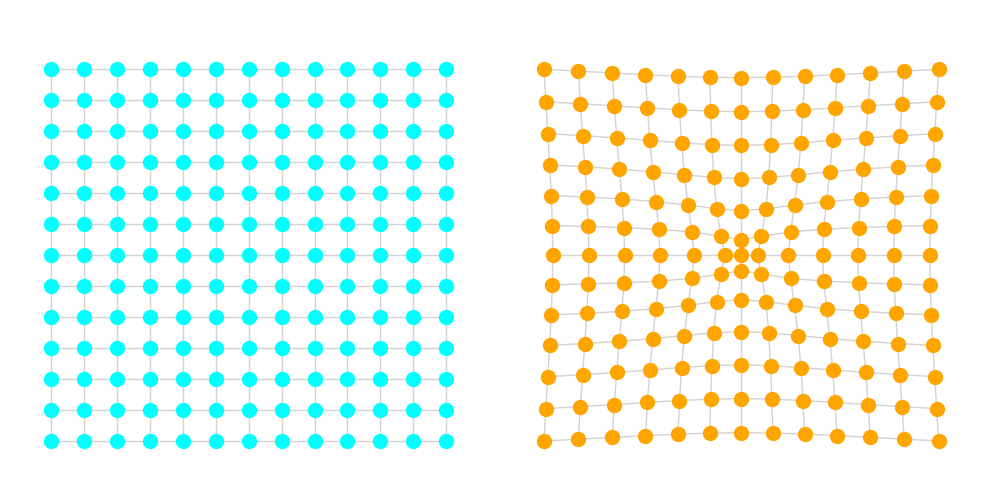

In [84]:
# Parameters
grid_size = 6  # This is now half the size, as we go from -grid_size to +grid_size
spacing = 1  # Adjust this value to change the spacing between nodes

# Create the 2D lattice grid using networkx
G = nx.grid_2d_graph(grid_size * 2 + 1, grid_size * 2 + 1)  # This creates a grid from -grid_size to +grid_size

# Position nodes in 2D space for the original grid, with spacing applied
pos_original = {node: (np.array(node) - grid_size) * spacing for node in G.nodes}  # Centering the grid around (0,0)

# Define the scaling function based on the metric scaling factor
def scaling_function(p, G=1, c=1, M=1):
    r1 = np.sqrt(p[0]**2 + p[1]**2)
    scaling_factor = 1 / (1 + G * M / (2 * c**2 * r1))**2
    return np.array([p[0] * scaling_factor, p[1] * scaling_factor])

# Create the transformed positions
pos_transformed = {node: scaling_function(pos_original[node]) for node in G.nodes}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original grid
nx.draw(G, pos_original, ax=axes[0], node_size=100, node_color='cyan', edge_color='lightgrey')
axes[0].set_title('Original Grid')

# Plot the transformed grid
nx.draw(G, pos_transformed, ax=axes[1], node_size=100, node_color='orange', edge_color='lightgrey')
axes[1].set_title('Transformed Grid')

plt.tight_layout()
plt.show()

## Calculate the geodesics for the 2nd one. 

In [198]:
%%manim -qh aparrent_positions
class aparrent_positions(Scene):
    def obtain_coords(self, prop = 0.25 , up_to = 0.967):
        X_1 = coords_list[0][1][0]
        Y_1 = coords_list[0][1][1]
        Y_inv = -Y_1
        
        length = len(X_1)
        X = prop * X_1[:round(up_to * length)]
        Y = prop * Y_1[:round(up_to * length)]
        Z = prop * Y_inv[:round(up_to * length)]
        return X, Y, Z
    
    def construct(self, prop = 0.25): 
        self.camera.frame_center = [0, -0.5, 0]
        X_1, Y_1, Y_inv = self.obtain_coords()
        BH = Circle(radius=prop * Rs).set_color(BLACK)
        BH.set_stroke(color=RED_A, width=1.5)
        
        
        ## Create the Title and the Black hole text below
        TITLE = Tex('Light paths', font_size = 30).shift(UP * 2.4)
        BH_desc = Text('Black hole', font_size = 13).next_to(BH, DOWN)
        
        line = VGroup() 
        line2 = VGroup()
        points_1 = [np.array([x, y, 0]) for x, y in zip(X_1, Y_1)]
        points_2 = [np.array([x, y, 0]) for x, y in zip(X_1, Y_inv)]
        
        
        line.set_points_as_corners(points_1)
        line.set_color(YELLOW_A)
        line.set_stroke(width=3.5, opacity=0.7)
        
        line2.set_points_as_corners(points_2)
        line2.set_color(YELLOW_A)
        line2.set_stroke(width=3.5, opacity=0.7)
        
        # Mark initial positions
        start_marker_1 = Cross(stroke_width = 4).scale(0.1).move_to(points_1[0])
        start_label_1 = Text('Photon Source', font_size=12).next_to(start_marker_1, DOWN)
        self.play(Write(TITLE))
        self.play(Create(line), Create(line2), FadeIn(BH), Create(start_marker_1), Create(start_label_1), FadeIn(BH_desc), run_time = 1.5)
        
        ## Mark the actual star positions
        star_marker = Cross(stroke_width = 4, stroke_color = BLUE_A).scale(0.1).move_to(points_1[-1])
        star_marker_txt = Text('Actual position', font_size=12).next_to(star_marker, DOWN)
        
        self.play(Create(star_marker),Create(star_marker_txt))
        self.wait(2)
        
        # Calculate the gradient for the first two points
        grad_1 = (Y_1[1] - Y_1[0]) / (X_1[1] - X_1[0])
        grad_2 = (Y_inv[1] - Y_inv[0]) / (X_1[1] - X_1[0])
        
        # Extend the lines to X_1[-1]
        Y1_ext = Y_1[0] + grad_1 * (X_1[-1] - X_1[0])
        Y2_ext = Y_inv[0] + grad_2 * (X_1[-1] - X_1[0])
        
        extended_points_1 = [np.array([X_1[0], Y_1[0], 0]), np.array([X_1[-1], Y1_ext, 0])]
        extended_points_2 = [np.array([X_1[0], Y_inv[0], 0]), np.array([X_1[-1], Y2_ext, 0])]
        
        ## Animate the apparent star positions
        star_marker_app = Cross(stroke_width = 4, stroke_color = BLUE_B).scale(0.1).move_to(extended_points_1[-1])
        star_marker_app_txt = Text('Apparent positions', font_size=12).next_to(star_marker_app, DOWN * 1.1)
        star_marker_app_2 = Cross(stroke_width = 4, stroke_color = BLUE_B).scale(0.1).move_to(extended_points_2[-1])
        star_marker_app_txt_2 = Text('Apparent positions', font_size=12).next_to(star_marker_app_2, DOWN * 1.1)
        
        line_ext = VMobject()
        line_ext.set_points_as_corners(extended_points_1)
        line_ext.set_color(WHITE)
        line_ext.set_stroke(width=3.5, opacity=0.7)
        
        line2_ext = VMobject()
        line2_ext.set_points_as_corners(extended_points_2)
        line2_ext.set_color(WHITE)
        line2_ext.set_stroke(width=3.5, opacity=0.7)
        
        # Transform the original lines into the extended lines
        self.play(Transform(line, line_ext), Transform(line2, line2_ext), FadeOut(BH), FadeOut(BH_desc), run_time=1.5)
        self.play(Create(star_marker_app), Create(star_marker_app_2), Write(star_marker_app_txt), Write(star_marker_app_txt_2))
        self.wait(2)
        
        # Repeated transformation loop
        for _ in range(2):
            ## Redefine the geodesic path lines
            line_ext = VMobject().set_points_as_corners(extended_points_1).set_color(WHITE).set_stroke(width=3.5, opacity=0.7)
            line2_ext = VMobject().set_points_as_corners(extended_points_2).set_color(WHITE).set_stroke(width=3.5, opacity=0.7)
            OG_path = VMobject().set_points_as_corners(points_1).set_color(YELLOW_A).set_stroke(width=3.5, opacity=0.7)
            OG_path_2 = VMobject().set_points_as_corners(points_2).set_color(YELLOW_A).set_stroke(width=3.5, opacity=0.7)
            
            self.play(Transform(line, OG_path), Transform(line2, OG_path_2), FadeIn(BH), FadeIn(BH_desc), run_time=2.0)
            self.wait(0.5)
            self.play(Transform(line, line_ext), Transform(line2, line2_ext), FadeOut(BH), FadeOut(BH_desc), run_time=2.0)
            self.wait(0.5)
        
        # Final state, back to the "no black hole" scenario
        self.wait(2)
        
        

[08/19/24 20:26:58] INFO     Animation 0 : Partial movie file written in                   ]8;id=676166;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=281667;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2991897000_1767792669_223132457.mp4'                             

[08/19/24 20:27:01] INFO     Animation 1 : Partial movie file written in                   ]8;id=320411;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=465134;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_1617674930_2667128677.mp4'                            

[08/19/24 20:27:03] INFO     Animation 2 : Partial movie file written in                   ]8;id=164003;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=571628;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_1397848267_2769601892.mp4'                            

[08/19/24 20:27:04] INFO     Animation 3 : Partial movie file written in                   ]8;id=36509;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=339643;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_190800790_1018482446.mp4'                             

[08/19/24 20:27:08] INFO     Animation 4 : Partial movie file written in                   ]8;id=531198;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=716935;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_2515279083_4099405161.mp4'                            

[08/19/24 20:27:12] INFO     Animation 5 : Partial movie file written in                   ]8;id=248715;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=2777;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\4224996491_932381392_2697471912.mp4'                             

[08/19/24 20:27:14] INFO     Animation 6 : Partial movie file written in                   ]8;id=191150;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=391240;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_190800790_3299676472.mp4'                             

[08/19/24 20:27:20] INFO     Animation 7 : Partial movie file written in                   ]8;id=288234;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=486287;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_818391192_1651594736.mp4'                             

[08/19/24 20:27:21] INFO     Animation 8 : Partial movie file written in                   ]8;id=707357;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=103720;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_2526496290_3354770570.mp4'                            

[08/19/24 20:27:27] INFO     Animation 9 : Partial movie file written in                   ]8;id=917534;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=258295;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_4145305555_459607527.mp4'                             

[08/19/24 20:27:28] INFO     Animation 10 : Partial movie file written in                  ]8;id=767816;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=416994;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_2526496290_3946075430.mp4'                            

[08/19/24 20:27:34] INFO     Animation 11 : Partial movie file written in                  ]8;id=94766;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=266652;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_818391192_655015486.mp4'                              

[08/19/24 20:27:35] INFO     Animation 12 : Partial movie file written in                  ]8;id=607783;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=223287;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_2526496290_724783147.mp4'                             

[08/19/24 20:27:41] INFO     Animation 13 : Partial movie file written in                  ]8;id=134490;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=796968;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_4145305555_4079277982.mp4'                            

[08/19/24 20:27:42] INFO     Animation 14 : Partial movie file written in                  ]8;id=235624;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=398741;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_2526496290_2128881497.mp4'                            

[08/19/24 20:27:43] INFO     Animation 15 : Partial movie file written in                  ]8;id=368605;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=757212;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\aparrent_positions\2411941321_190800790_4085407330.mp4'                             

                    INFO     Combining to Movie file.                                      ]8;id=493786;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=699423;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[08/19/24 20:27:44] INFO                                                                   ]8;id=186086;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=566410;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\aparrent_positions                         
                             .mp4'                                                                                 
                                                                                                                   

                    INFO     Rendered aparrent_positions                                               ]8;id=487184;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=223598;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 16 animations                                                                  

## The Geometry of the Black hole to light at the End. Use the Pandas dataframe

In [200]:
import pandas as pd 
csv_1 = file_path / 'Crucial_info.csv'
csv_2 = file_path / 'Pixel_information.csv'

data_crucial = pd.read_csv(csv_1, low_memory=False)
data_pixel = pd.read_csv(csv_2, low_memory = False)

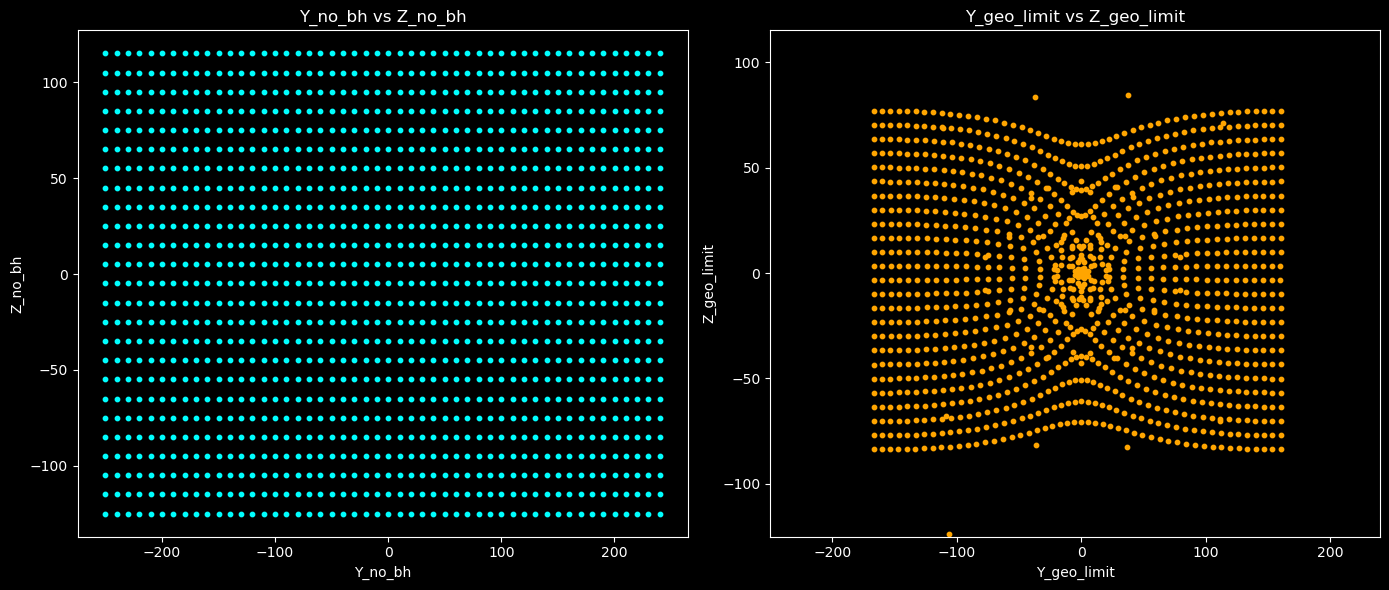

In [214]:
# Total number of points along each axis
total_x_points = 3000
total_y_points = 1500

# Number of points to select
selected_x_points = 50
selected_y_points = 25

# Calculate the step size to evenly sample the points
x_step = total_x_points // selected_x_points
y_step = total_y_points // selected_y_points

# Generate the indices for downsampling
x_indices = np.arange(0, total_x_points, x_step)
y_indices = np.arange(0, total_y_points, y_step)

# Initialize an empty list to store the selected rows
selected_rows = []

# Loop over each y_index and select the corresponding rows in x_indices
for y_index in y_indices:
    for x_index in x_indices:
        row_idx = y_index * total_x_points + x_index
        selected_rows.append(data_pixel.iloc[row_idx])

# Create a new DataFrame with the selected rows
downsampled_df = pd.DataFrame(selected_rows)

x_lim = (downsampled_df['Y_no_bh'].min(), downsampled_df['Y_no_bh'].max())
y_lim = (downsampled_df['Z_no_bh'].min(), downsampled_df['Z_no_bh'].max())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.style.use('dark_background')

# Plot 1: Y_no_bh vs Z_no_bh
axes[0].scatter(downsampled_df['Y_no_bh'], downsampled_df['Z_no_bh'], c='cyan', s=10)
axes[0].set_title('Y_no_bh vs Z_no_bh')
axes[0].set_xlabel('Y_no_bh')
axes[0].set_ylabel('Z_no_bh')

# Plot 2: Y_geo_limit vs Z_geo_limit
axes[1].scatter(downsampled_df['Y_geo_limit'], downsampled_df['Z_geo_limit'], c='orange', s=10)
axes[1].set_title('Y_geo_limit vs Z_geo_limit')
axes[1].set_xlabel('Y_geo_limit')
axes[1].set_ylabel('Z_geo_limit')

# Set the same x and y limits for both plots
axes[1].set_xlim(x_lim)
axes[1].set_ylim(y_lim)

plt.tight_layout()
plt.show()

In [222]:
%%manim -qh BlackHoleGeometry
class BlackHoleGeometry(Scene):
    def downsample_data(self):
        # Total number of points along each axis
        total_x_points = 3000
        total_y_points = 1500

        # Number of points to select
        selected_x_points = 50
        selected_y_points = 25

        # Calculate the step size to evenly sample the points
        x_step = total_x_points // selected_x_points
        y_step = total_y_points // selected_y_points

        # Generate the indices for downsampling
        x_indices = np.arange(0, total_x_points, x_step)
        y_indices = np.arange(0, total_y_points, y_step)

        # Initialize an empty list to store the selected rows
        selected_rows = []

        # Loop over each y_index and select the corresponding rows in x_indices
        for y_index in y_indices:
            for x_index in x_indices:
                row_idx = y_index * total_x_points + x_index
                selected_rows.append(data_pixel.iloc[row_idx])

        # Create a new DataFrame with the selected rows
        downsampled_df = pd.DataFrame(selected_rows)
        
        return downsampled_df
    
    def construct(self):
        # Scaling factor to match the plot to the scene size
        scale_factor = 0.03
        downsampled_df = self.downsample_data()
        # Create VGroup for the original grid (Y_no_bh vs Z_no_bh)
        original_points = VGroup()
        for i in range(len(downsampled_df)):
            dot = Dot(point=[downsampled_df['Y_no_bh'].iloc[i] * scale_factor,
                             downsampled_df['Z_no_bh'].iloc[i] * scale_factor, 0],
                      radius=0.02, color=BLUE_A)
            original_points.add(dot)
        
        # Create VGroup for the transformed grid (Y_geo_limit vs Z_geo_limit)
        transformed_points = VGroup()
        for i in range(len(downsampled_df)):
            dot = Dot(point=[downsampled_df['Y_geo_limit'].iloc[i] * scale_factor,
                             downsampled_df['Z_geo_limit'].iloc[i] * scale_factor, 0],
                      radius=0.02, color=YELLOW_B)
            transformed_points.add(dot)
        
        # Position the original grid in the center
        original_points.move_to(ORIGIN).shift(DOWN * 1)
        transformed_points.shift(DOWN * 1)
        ## Play the TITLE 
        TITLE = Tex('Flat space', font_size = 34).shift(UP * 3.0)
        TITLE2 = Tex('Space-time warping', font_size = 34).shift(UP * 3.0) 
        
        # Play the creation of the original grid
        self.play(Create(original_points), Write(TITLE))
        self.wait(2)
        
        # Transform the original grid to the distorted grid
        self.play(Transform(original_points, transformed_points),Transform(TITLE, TITLE2), run_time = 3.0)
        self.wait(2)
        
        # # Optionally, transform back to the original grid
        # self.play(Transform(original_points, original_points.copy()))
        # self.wait(2)

[08/19/24 21:32:22] INFO     Animation 0 : Partial movie file written in                   ]8;id=436994;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=412322;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\BlackHoleGeometry\2902699114_2441379272_223132457.mp4'                              

[08/19/24 21:32:25] INFO     Animation 1 : Partial movie file written in                   ]8;id=136983;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=591305;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\BlackHoleGeometry\3931933789_190800790_2106522225.mp4'                              

[08/19/24 21:33:05] INFO     Animation 2 : Partial movie file written in                   ]8;id=24969;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=4575;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\BlackHoleGeometry\3931933789_4216886143_1994393667.mp4'                             

[08/19/24 21:33:08] INFO     Animation 3 : Partial movie file written in                   ]8;id=839625;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=937711;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\BlackHoleGeometry\3931933789_190800790_837464166.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=284050;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332640;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=471140;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=881562;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\BlackHoleGeometry.                         
                             mp4'                                                                                  
                                                                                                                   

                    INFO     Rendered BlackHoleGeometry                                                ]8;id=320577;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=697074;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

## Simple animation of 2 classes of ImageMobjects being created

In [232]:
%%manim -qh RenderImageOne
class RenderImageOne(Scene):
    def construct(self):
        # Paths to the images
        path = r'C:\Users\Bowen\Desktop\CHE\PostGraduate\Personal Proj\Physics\General Relativity\Pictures\Blackhole1.png'
        path_2 = r'C:\Users\Bowen\Desktop\CHE\PostGraduate\Personal Proj\Physics\General Relativity\Pictures\Blackhole2.PNG'
        
        # Create ImageMobject instances
        BH = ImageMobject(path)
        BH_2 = ImageMobject(path_2)
        
        # Position BH_2 offscreen initially
        BH_2.scale(1.5).move_to(RIGHT * 15)
        
        # Fade in the first black hole image
        self.play(FadeIn(BH), FadeIn(BH_2), run_time=2.5)
        self.wait(2)
        
        # Move BH offscreen and move BH_2 to the origin
        self.play(BH.animate.shift(LEFT * 15), BH_2.animate.move_to(ORIGIN), run_time=2.5)
        self.wait(2)
        

[08/20/24 21:06:44] INFO     Animation 0 : Partial movie file written in                   ]8;id=308460;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=198722;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\RenderImageOne\2902699114_3901572309_223132457.mp4'                                 

[08/20/24 21:06:45] INFO     Animation 1 : Partial movie file written in                   ]8;id=108745;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=789479;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\RenderImageOne\3931933789_190800790_1454791602.mp4'                                 

[08/20/24 21:07:12] INFO     Animation 2 : Partial movie file written in                   ]8;id=318465;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=44309;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\RenderImageOne\3931933789_3216903565_928581133.mp4'                                 

[08/20/24 21:07:13] INFO     Animation 3 : Partial movie file written in                   ]8;id=858715;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=280610;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\RenderImageOne\3931933789_190800790_3298500642.mp4'                                 

                    INFO     Combining to Movie file.                                      ]8;id=445637;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=709098;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=258956;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=924713;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\RenderImageOne.mp4                         
                             '                                                                                     
                                                                                                                   

                    INFO     Rendered RenderImageOne                                                   ]8;id=278854;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=578507;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

In [1]:
from manim import * 

Manim Community v0.17.3

In [5]:
%%manim -qh Opening_Scene

class Opening_Scene(Scene):
    def construct(self):
        text1 = Tex('Making a langchain app')
        self.play(Write(text1))
        self.wait()
        self.play(FadeOut(text1)) 
        

%%manim -qh Visualize_code

class Visualize_code(Scene):   
    def construct(self, file_path = r'C:\Users\Bowen\Desktop\CHE\PostGraduate\Personal Proj\RL\Code_for_reference.png'
                 ,file_path_2 = r'C:\Users\Bowen\Desktop\CHE\PostGraduate\Personal Proj\RL\front_end_code.png'):  
        code_on_side = ImageMobject(file_path).scale(0.9).shift(LEFT * 2) 
        steps = Tex('Steps to make the app').scale(0.5).shift(RIGHT * 4 + UP * 3)
        self.play(FadeIn(code_on_side), FadeIn(steps))
        
        # Create individual boxes with text
        width_x = 2.0
        height_y = 0.85
        line_thickness = 0.5  # Adjust stroke width here
        
        step1_box = Rectangle(width=width_x, height=height_y, color=WHITE, fill_opacity=0.1, stroke_width=line_thickness)
        step1_box.next_to(steps, direction=DOWN)
        step1_text = Tex("1) Data Loading").scale(0.35).move_to(step1_box.get_center())

        step2_box = Rectangle(width=width_x, height=height_y, color=WHITE, fill_opacity=0.1, stroke_width=line_thickness)
        step2_box.next_to(step1_box, direction=DOWN)
        step2_text = Tex("2) Text Splitting").scale(0.35).move_to(step2_box.get_center())

        step3_box = Rectangle(width=width_x, height=height_y, color=WHITE, fill_opacity=0.1, stroke_width=line_thickness)
        step3_box.next_to(step2_box, direction=DOWN)
        step3_text = Tex("3) Vector Store").scale(0.35).move_to(step3_box.get_center())

        step4_box = Rectangle(width=width_x, height=height_y, color=WHITE, fill_opacity=0.1, stroke_width=line_thickness)
        step4_box.next_to(step3_box, direction=DOWN)
        step4_text = Tex("4,5) Retrieval/Generation").scale(0.3).move_to(step4_box.get_center())

        step5_box = Rectangle(width=width_x, height=height_y, color=WHITE, fill_opacity=0.1, stroke_width=line_thickness)
        step5_box.next_to(step4_box, direction=DOWN)
        step5_text = Tex("6) Front-end").scale(0.35).move_to(step5_box.get_center())
        
        self.play(Create(step1_box), Create(step2_box), Create(step3_box), Create(step4_box), Create(step5_box)
                 , Write(step1_text), Write(step2_text), Write(step3_text), Write(step4_text), Write(step5_text))
        self.wait() 
        
        
        # Red rectangle for highlighting 5 different rectangles are required and fine tuned
        highlight_rect = Rectangle(width=width_x*3.6, height=height_y * 2.3, stroke_color=RED, stroke_width=1.5, fill_opacity=0)
        highlight_rect.shift(LEFT * 2.25 + UP * 0.8)

        self.play(Create(highlight_rect))
        self.wait()  
        
        # Arrow from the middle of the right side of highlight_rect to the middle of the left side of step1_box
        arrow1 = Arrow(start=highlight_rect.get_right(),end=steps.get_left() + DOWN * 0.85, stroke_color=WHITE, buff=0.1,
                      stroke_width=2,   max_tip_length_to_length_ratio=0.05)
        
        self.play(Create(arrow1))
        self.wait(2.5) 
        self.play(Uncreate(arrow1), Uncreate(highlight_rect))
        
        ## 2nd highlight_rectangle
        highlight_rect2 = Rectangle(width=width_x*2.7, height=height_y * 0.6, stroke_color=RED, stroke_width=1.5, fill_opacity=0)
        highlight_rect2.shift(LEFT * 3.1 + DOWN * 0.4) 

        self.play(Create(highlight_rect2))
        
        # Arrow from the middle of the right side of highlight_rect to the middle of the left side of step1_box
        arrow2 = Arrow(start=highlight_rect2.get_right(),end=step2_text.get_left() + LEFT * 0.5, stroke_color=WHITE, buff=0.1,
                      stroke_width=2,   max_tip_length_to_length_ratio=0.05)
        
        self.play(Create(arrow2))
        self.wait(3)
        self.play(Uncreate(arrow2), Uncreate(highlight_rect2))
        
        ## Add the 3rd box 
        highlight_rect3 = Rectangle(width=width_x*2.7, height=height_y * 0.2, stroke_color=RED, stroke_width=1.5, fill_opacity=0)
        highlight_rect3.shift(LEFT * 3.1 + DOWN * 0.7) 

        self.play(Create(highlight_rect3))
        
        # Arrow from the middle of the right side of highlight_rect to the middle of the left side of step1_box
        arrow3 = Arrow(start=highlight_rect3.get_right(),end=step3_text.get_left() + LEFT * 0.5, stroke_color=WHITE, buff=0.1,
                      stroke_width=2,   max_tip_length_to_length_ratio=0.05)
        
        self.play(Create(arrow3))
        self.wait(4)
        self.play(Uncreate(arrow3), Uncreate(highlight_rect3))
        
        ## Add the 4th box 
        highlight_rect4 = Rectangle(width=width_x*3.4, height=height_y * 1.8, stroke_color=RED, stroke_width=1.5, fill_opacity=0)
        highlight_rect4.shift(LEFT * 2.4 + DOWN * 1.8) 

        self.play(Create(highlight_rect4))
        
        # Arrow from the middle of the right side of highlight_rect to the middle of the left side of step1_box
        arrow4 = Arrow(start=highlight_rect4.get_right(),end=step4_text.get_left() + LEFT * 0.5, stroke_color=WHITE, buff=0.1,
                      stroke_width=2,   max_tip_length_to_length_ratio=0.05)
        
        self.play(Create(arrow4))
        self.wait(5)
        self.play(Uncreate(arrow4), Uncreate(highlight_rect4), FadeOut(code_on_side))
        
        ## Change the ImageMobject into something else
        code_on_side_2 = ImageMobject(file_path_2).shift(LEFT * 2.8) 
        self.play(FadeIn(code_on_side_2)) 
        self.wait() 
        
        ## Make the final rectangle 
        highlight_rect5 = Rectangle(width=width_x*3.6, height=height_y * 5, stroke_color=RED, stroke_width=1.5, fill_opacity=0)
        highlight_rect5.shift(LEFT * 2.0 + DOWN * 0) 
        self.play(FadeIn(highlight_rect5))

        arrow5 = Arrow(start=highlight_rect5.get_right(),end=step5_text.get_left() + LEFT * 0.4, stroke_color=WHITE, buff=0.1,
              stroke_width=2,   max_tip_length_to_length_ratio=0.05)

        self.play(Create(arrow5))
        self.wait(1.5)
        self.play(Uncreate(arrow5), Uncreate(highlight_rect5), FadeOut(code_on_side_2))
        self.wait()
        self.play(FadeOut(steps),FadeOut(step1_box), FadeOut(step2_box), FadeOut(step3_box), FadeOut(step4_box), FadeOut(step5_box)
         , FadeOut(step1_text), FadeOut(step2_text), FadeOut(step3_text), FadeOut(step4_text), FadeOut(step5_text))
        self.wait()

        
        

In [86]:
%%manim -qh Final_Remarks

class Final_Remarks(Scene):
    def construct(self):
        # Title
        title = Tex("Final Remarks").scale(1.2).shift(UP * 1.5)
        
        # Main points
        bullet_points = BulletedList(
            "LangChain helps LLMs understand specialized topics",
            "Thes apps aren't perfect, but we can improve them",
            "This work bridges the gap between general knowledge and domain expertise",
            "AI will become a powerful tool for professionals",
            dot_scale_factor=1.2
        ).scale(0.7).next_to(title, DOWN, buff=0.5)

        # Play animations

        self.play(Write(title), FadeIn(bullet_points), run_time = 2.1)
        self.wait(5)
        self.play(FadeOut(title), FadeOut(bullet_points), run_time = 2.1)
        
        # Final thank you message
        thank_you = Tex("Thank you for watching!")
        details = Tex('Created by:').scale(0.6).next_to(thank_you, direction = DOWN * 1.5).shift(LEFT * 1.2)
        name = Tex('Bowen Shiro Husin').scale(0.6).next_to(details, direction = RIGHT)
        self.play(Write(thank_you), FadeIn(details), FadeIn(name))
        self.wait(3)
        self.play(FadeOut(thank_you), Uncreate(details), Uncreate(name))
        self.wait(2)
        
    

[08/09/24 14:58:57] INFO     Animation 0 : Partial movie file written in                   ]8;id=978889;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=650535;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\Final_Remarks\2902699114_294000764_223132457.mp4'                                   

[08/09/24 14:59:01] INFO     Animation 1 : Partial movie file written in                   ]8;id=612175;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=697971;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\Final_Remarks\3931933789_2292429055_2382497023.mp4'                                 

[08/09/24 14:59:12] INFO     Animation 2 : Partial movie file written in                   ]8;id=247406;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=450947;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\Final_Remarks\2365230007_3399503699_1424604587.mp4'                                 

[08/09/24 14:59:13] INFO     Animation 3 : Using cached data (hash :                           ]8;id=930159;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=607523;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_2009455560_4174018169)                                                     

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=883545;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=917362;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2365230007_3073779459_3573516678)                                                     

                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=934721;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=555728;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3931933789_3197088928_4100802693)                                                     

[08/09/24 14:59:15] INFO     Animation 6 : Partial movie file written in                   ]8;id=688547;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=682628;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\partial_movie_file                         
                             s\Final_Remarks\2365230007_190800790_2631499151.mp4'                                  

                    INFO     Combining to Movie file.                                      ]8;id=869891;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=744617;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=295155;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=385412;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\1080p60\Final_Remarks.mp4'                         
                                                                                                                   

                    INFO     Rendered Final_Remarks                                                    ]8;id=426403;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=75833;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 7 animations                                                                   